## 1.数据explore和preprocessing
- 数据探索：缺失值分析（属性的某些值或某些属性缺失），异常值分析（数据集中不合理或明显偏离其它观测值的数据），一致性分析（数据自相矛盾，不相容，多是数据来源不一致，在集成过程导致）
- 数据预处理：缺失值处理（删除、替换、插补等等），异常值处理（删除、视为缺失值、平均值修正），噪声数据（平滑技术处理，如分箱、回归、聚类等）
- 本例数据如下图，数据处理任务包括选定目标变量，丢弃不必要的特征，转换数值，缺失值处理

### 数据预处理方案
- UserId-学生的学号，与学生是否通过考试无关，可以丢弃；
- term-开课学期，可以认为与学生是否通过考试关系不大，可以丢弃；
- UserClass-根据学生位置和时间特点划分的类别，与学习表现有关，保留；
- grade-学生年级，不确定与学生是否通过考试有关，保留；
- gender-性别，可能与学生是否通过考试有关系，保留；
- majorClass-专业类别，这门课是思想道德修养与法律基础，文科的学生可能更容易通过考试，保留；
- totalLearningTime-学生总学习时长，与学习成绩密切相关，保留；
- TimeClass-学习时段个数，与学习表现有关，保留；
- LocationClass-学生学习的地理位置个数，可能与学习表现有关，保留；
- isPassExam-是否通过考试，是我们分析的目标变量，保留；


导入数据preprocessing用到的包

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import pandas as pd

用pandas处理数据

In [2]:
data = pd.read_csv('student_data_DT2.csv', index_col=0) #使用pandas读取数据
print(data)

      UserId    term  UserClass  grade  gender  majorClass  totalLearningTime  \
1     213930  201701          2   2016       2           1              57941   
2     213931  201701          4   2016       1           1              19306   
3     213932  201502          2   2015       2           1              41767   
4     213933  201701          5   2016       2           1               8167   
5     213934  201702          4   2017       2           1               8626   
...      ...     ...        ...    ...     ...         ...                ...   
1230  215782  201502          4   2016       1           2               1311   
1231  215812  201701          1   2016       1           2              31919   
1232  215813  201502          1   2015       2           2              36678   
1233  215825  201502          2   2015       1           2               5267   
1234  215826  201702          6   2017       1           2                  3   

      TimeClassNumber  Loca

丢弃无用的特征：ID、UserId、term

In [3]:
data.drop(['UserId', 'term'], axis=1, inplace=True)## 丢弃无用的特征
data.head(20)#打印前20行数据

,UserClass,grade,gender,majorClass,totalLearningTime,TimeClassNumber,LocationClassNumber,isPassExam
1,2,2016,2,1,57941,6,4,0
2,4,2016,1,1,19306,4,5,0
3,2,2015,2,1,41767,5,3,0
4,5,2016,2,1,8167,3,1,0
5,4,2017,2,1,8626,3,5,0
6,1,2016,2,1,35269,5,3,0
7,1,2016,1,1,99769,6,7,0
8,3,2015,1,1,2148,2,3,0
9,2,2017,2,1,90904,6,3,0
10,3,2016,2,1,42092,4,2,0


缺失值处理：TotalLearningTime 有缺失值，可以用平均值代替。

In [4]:
table =data[data['totalLearningTime'].isnull().values==False]
score_avg = data['totalLearningTime'].mean()
table = data['totalLearningTime'].fillna(value=score_avg)
data['totalLearningTime'] = table
data.head(20)#打印前20行数据

,UserClass,grade,gender,majorClass,totalLearningTime,TimeClassNumber,LocationClassNumber,isPassExam
1,2,2016,2,1,57941,6,4,0
2,4,2016,1,1,19306,4,5,0
3,2,2015,2,1,41767,5,3,0
4,5,2016,2,1,8167,3,1,0
5,4,2017,2,1,8626,3,5,0
6,1,2016,2,1,35269,5,3,0
7,1,2016,1,1,99769,6,7,0
8,3,2015,1,1,2148,2,3,0
9,2,2017,2,1,90904,6,3,0
10,3,2016,2,1,42092,4,2,0


## 2. 构建决策树模型

### 2.1 划分数据集
- sklearn.model_selection 的 train_test_split方法

In [5]:
from sklearn.model_selection import train_test_split

y = data['isPassExam'].values #获取目标变量（label）
X = data.drop(['isPassExam'], axis=1).values#丢弃目标变量，得到输入变量
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)#划分测试集和训练集

print('train dataset: {0}; test dataset: {1}'.format(
    X_train.shape, X_test.shape)) #训练集和测试集的样本数

train dataset: (987, 7); test dataset: (247, 7)


###  2.2 模型构建
构建模型 sklearn.tree 的 DecisionTreeClassifier()方法，参数如下：
- criterion:特征选择算法，可选择信息熵(entropy)或基尼不纯度(gini);
- splitter:特征划分点选择标准，可以使用“best”或者“random”。前者在特征的所有划分点中找出最优的划分点。后者是随机的在部分划分点中找局部最优的划分点；
- max_depth:指定决策树的最大深度，可解决过拟合问题；
- max_features：划分时考虑的最大特征数，如果是None表示考虑所有特征，也可以是其它指定的个数
- min_samples_split:内部节点再划分所需最小样本数，小于此值不创建分支，一般是2，是一种前剪枝办法；适用于样本量大的情况；
- min_samples_leaf:叶子节点需要的最小的样本个数，如果叶子节点数小于设定的值，则会跟兄弟节点一起被剪枝，可以设定具体个数或者百分比，这也是一种前剪枝办法；
- max_leaf_nodes:限制最大的叶子节点个数，即叶子个数最多不能超过的值，主要是防止过拟合
- min_impurity_decrease：最小不纯度，这个值限制了决策树的增长，如果某节点的不纯度(基尼系数，信息增益，均方差，绝对差)小于这个阈值，则该节点不再生成子节点,即为叶子节点;

In [6]:
from sklearn.tree import DecisionTreeClassifier #使用这个包构建决策树

clf = DecisionTreeClassifier() #构建决策树

###  2.3 训练和评估模型
- 训练模型DecisionTreeClassifier().fit()，填入训练数据的x和y
- 评估模型score()获得准确率，sklearn.metrics 的 precision_recall_curve方法获得精度 召回率等

In [12]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

clf.fit(X_train, y_train)#拟合模型

train_predict = clf.predict(X_train)
test_predict = clf.predict(X_test)

train_accuracy = accuracy_score(y_train,train_predict)
print('train_accuracy',train_accuracy)

train_recall = recall_score(y_train,train_predict)
print('train_recall',train_recall)

test_accuracy = accuracy_score(y_test,test_predict)
print('test_accuracy',test_accuracy)

test_recall = recall_score(y_test,test_predict)
print('test_recall',test_recall)


train_accuracy 1.0
train_recall 1.0
test_accuracy 0.6234817813765182
test_recall 0.5490196078431373


### 2.4 决策树可视化
- 先安装graphviz工具，将其安装路径加入环境变量
- 使用sklearn.tree.export_graphviz()方法画决策树，生成PDF或图片

In [13]:
from sklearn.tree import export_graphviz
from sklearn import tree
import pydotplus

#将决策树导出为.dot文件
with open("students_dt.dot", 'w') as f:
    f = export_graphviz(clf, out_file=f)
    
#或者也可以导出为pdf

dot_data = tree.export_graphviz(clf, out_file=None)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_pdf("students_dt.pdf")

True

### 2.3 交叉验证
- sklearn.model_selection的cross_val_score方法

In [14]:
from sklearn.model_selection import  cross_val_score

print('X.shape',X.shape)
print('y.shape',y.shape)
scores = cross_val_score(clf, X, y, cv=5) #五次交叉验证结果
print('scores',scores)
scores_series = pd.Series(scores)
scores_mean = scores_series.mean() #求得五次交叉验证结果平均值
print('scores_mean',scores_mean)

X.shape (1234, 7)
y.shape (1234,)
scores [0.53441296 0.53441296 0.63967611 0.61538462 0.63414634]
scores_mean 0.5916065962279057


## 3.模型调优
- 上述结果中train score>>test score.显然上述模型出现了over fitting
- 对模型进行调优，降低过拟合（over fitting）
- 决策树降低过拟合：前剪枝、后剪枝

### Sklearn只提供了前剪枝的方法，如设置划分标准、降低深度、减少叶子个数等
### (1)调整max_depth
- 通过尝试将max_depth取值设为2-15，测试不同取值的模型评分，选出测试集评分最高时候的max_depth，同时保证训练集和测试集的差别比较小

best param: 5; best score: 0.7530364372469636


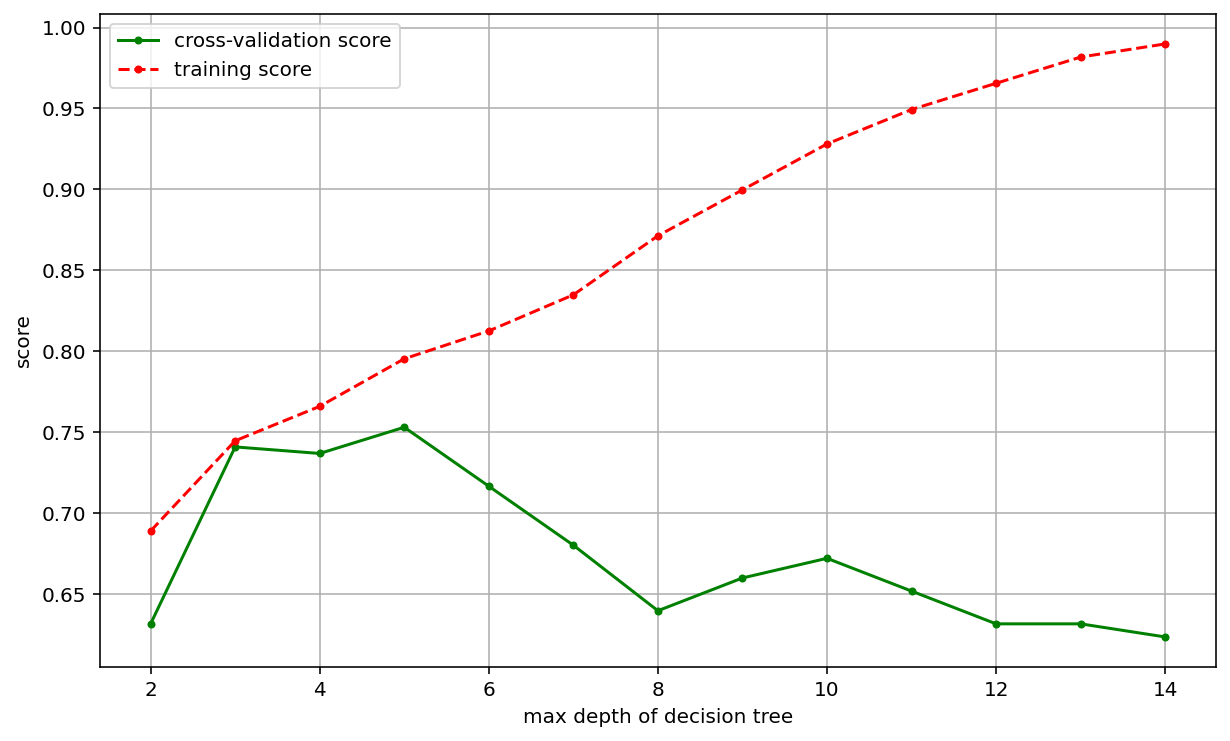

In [30]:
import numpy as np
# 参数选择 -max_depth
def cv_score(d):#该函数返回设置max_depth为某个值时得到的模型评估分数
    clf = DecisionTreeClassifier(max_depth=d)
    clf.fit(X_train, y_train)
    tr_score = clf.score(X_train, y_train)
    cv_score = clf.score(X_test, y_test)
    return (tr_score, cv_score)

depths = range(2, 15)
scores = [cv_score(d) for d in depths] #得到设置一系列max_depth值时，模型的评分
tr_scores = [s[0] for s in scores] #训练集得分
cv_scores = [s[1] for s in scores]#验证集得分

#得到最佳depth值
best_score_index = np.argmax(cv_scores) #选出评分最高的模型index
best_score = cv_scores[best_score_index]#根据这个index得到最高评分
best_param = depths[best_score_index]#根据这个index得到决策树最佳深度值
print('best param: {0}; best score: {1}'.format(best_param, best_score))

# 画出决策树最大深度与评分之间的关系
plt.figure(figsize=(10, 6), dpi=144)
plt.grid()
plt.xlabel('max depth of decision tree')
plt.ylabel('score')
plt.plot(depths, cv_scores, '.g-', label='cross-validation score')#测试集
plt.plot(depths, tr_scores, '.r--', label='training score')#训练集
plt.legend()

### (2)调整划分准则criterion
- 采用entropy（信息熵）或gini（基尼不纯度），设置他们的一系列阈值，选出最佳模型评分时的阈值
- 当低于该阈值时，不再生成新的枝叶

best param: 0.0020408163265306124; best score: 0.757085020242915


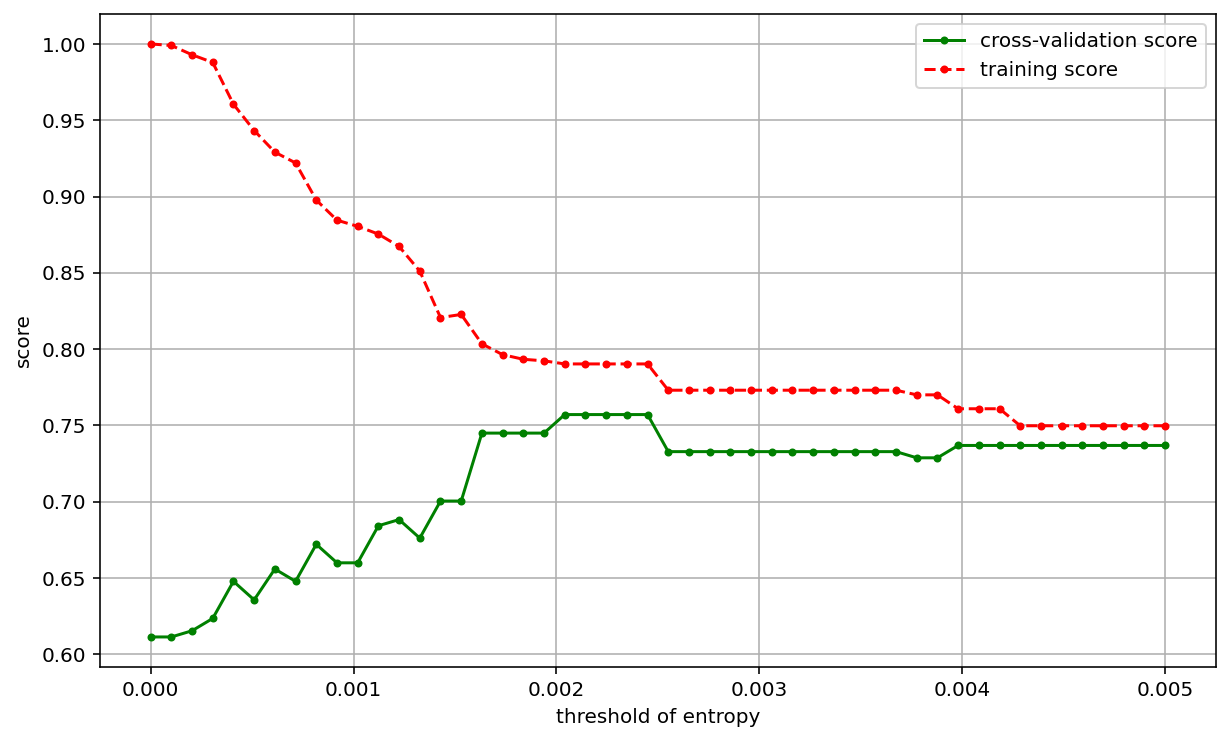

In [25]:
# 训练模型，并计算评分
def cv_score(val):#用基尼不纯度划分，设置基尼不纯度阈值
    clf = DecisionTreeClassifier(criterion='gini', min_impurity_decrease=val)
    clf.fit(X_train, y_train)
    tr_score = clf.score(X_train, y_train)
    cv_score = clf.score(X_test, y_test)
    return (tr_score, cv_score)

# 指定参数范围，分别训练模型，并计算评分
values = np.linspace(0, 0.005, 50)#将基尼不纯度指定为0到0.005之间均分的50个值
scores = [cv_score(v) for v in values]
tr_scores = [s[0] for s in scores]
cv_scores = [s[1] for s in scores]

# 找出评分最高的模型参数
best_score_index = np.argmax(cv_scores)
best_score = cv_scores[best_score_index]
best_param = values[best_score_index]
print('best param: {0}; best score: {1}'.format(best_param, best_score))

# 画出模型参数与模型评分的关系
plt.figure(figsize=(10, 6), dpi=144)
plt.grid()
plt.xlabel('threshold of entropy')
plt.ylabel('score')
plt.plot(values, cv_scores, '.g-', label='cross-validation score')
plt.plot(values, tr_scores, '.r--', label='training score')
plt.legend()

### (3)多参数联合考虑
- 使用 GridSearchCV（网格搜索）实现多参数（如同时考虑最大深度，基尼不纯度等参数）联合考虑
class sklearn.model_selection.GridSearchCV(estimator, param_grid, scoring=None, fit_params=None, n_jobs=1, iid=True, refit=True, cv=None, verbose=0, pre_dispatch='2*n_jobs', error_score='raise', return_train_score=True)
- 其关键参数是param_grid，这是一个字典，字典key值是待考查的参数名列表，通过枚举该列表所有值构建模型，多次计算训练模型，并得到模型评分
- 另一个关键字是cv，表示进行交叉验证的的规则，cv=5表示五折交叉验证
- 最终得到的最优参数和最高评分保存在clf.best_params和clf.best_score中
- clf.cv_results_保存了计算过程的中间结果，可以用于绘图看模型参数与模型评分的关系
- 我们先用min_impurity_decrease（节点划分最小不纯度,这个值限制了决策树的增长，如果某节点的不纯度小于这个阈值，则该节点不再生成子节点。）看看怎么使用

In [31]:
#画图代码，用于画出gridsearch方法中不同参数配置及评分
def plot_curve(train_sizes, cv_results, xlabel):
    train_scores_mean = cv_results['mean_train_score']#训练集评分均值
    train_scores_std = cv_results['std_train_score']# 训练集评分标准差
    test_scores_mean = cv_results['mean_test_score']#测试集评分均值
    test_scores_std = cv_results['std_test_score']# 测试集评分标准差
    plt.figure(figsize=(10, 6), dpi=144)
    plt.title('parameters turning')
    plt.grid()
    plt.xlabel(xlabel)
    plt.ylabel('score')
    plt.fill_between(train_sizes, 
                     train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, 
                     alpha=0.1, color="r")
    plt.fill_between(train_sizes, 
                     test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, 
                     alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, '.--', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, '.-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")

best param: {'min_impurity_decrease': 0.0018367346938775511}
best score: 0.645930022053257


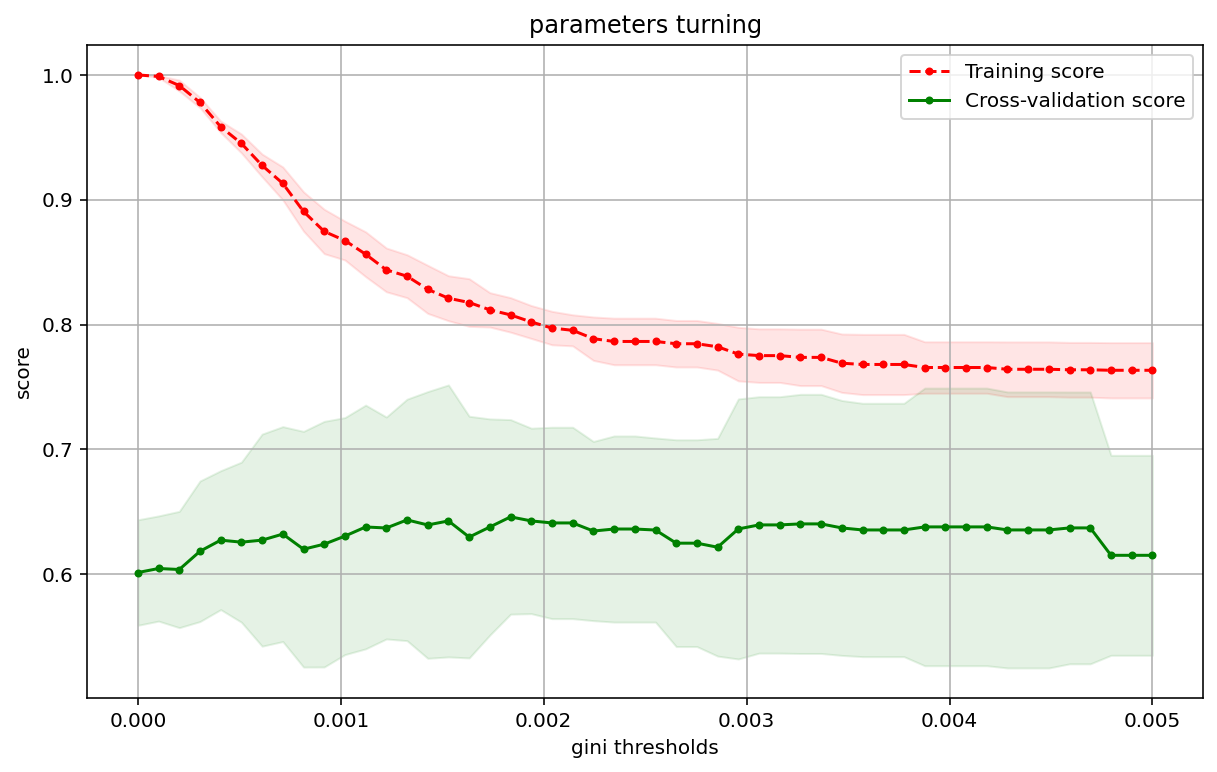

In [26]:
from sklearn.model_selection import GridSearchCV

thresholds = np.linspace(0, 0.005, 50) #gini阈值
# Set the parameters by cross-validation
param_grid = {'min_impurity_decrease': thresholds} #通过一个字典，定义要观察的参数和参数值，这里观察最小不纯度
#对设置参数后得到的模型进行五折交叉验证，返回训练集评分
clf = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, return_train_score=True)
clf.fit(X, y)
print("best param: {0}\nbest score: {1}".format(clf.best_params_, 
                                                clf.best_score_))

plot_curve(thresholds, clf.cv_results_, xlabel='gini thresholds')#画出gini不同阈值的评分结果

考虑多组变量（一个{}中包含一组变量的名字和取值）：
- 同时设置criterion（entropy，即划分准则）和min_impurity_decrease（最小信息增益不纯度）
- 同时设置criterion（entropy或gini，即划分准则）和min_impurity_decrease（最小基尼不纯度）
- 同时设置max_depth（最大深度）和min_samples_split（内部节点再划分所需最小样本数）

In [32]:
from sklearn.model_selection import GridSearchCV

entropy_thresholds = np.linspace(0, 0.01, 50)
gini_thresholds = np.linspace(0, 0.005, 50)

# Set the parameters by cross-validation
param_grid = [{'criterion': ['entropy'], 
               'min_impurity_decrease': entropy_thresholds},#同时设置criterion和min_impurity_decrease
              {'criterion': ['gini'], 
               'min_impurity_decrease': gini_thresholds},#同时设置criterion和min_impurity_decrease
              {'max_depth': range(2, 10)},
              {'min_samples_split': range(2, 30, 2)}]#同时设置criterion和min_impurity_decrease

clf = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, return_train_score=True)#配置最佳参数，并且为每一对参数进行交叉验证
clf.fit(X, y)
print("best param: {0}\nbest score: {1}".format(clf.best_params_, 
                                                clf.best_score_))
cv_result = pd.DataFrame.from_dict(clf.cv_results_) #将结果写入csv文件
with open('cv_result.csv','w') as f:
 cv_result.to_csv(f)

best param: {'max_depth': 4}
best score: 0.6702676014614397


## 生成决策树图形
- 用上述选择出的模型参数进行训练，画出决策树
- clf.feature_importances_，看下各特征的重要性

In [40]:
clf = DecisionTreeClassifier(max_depth=4)
clf.fit(X_train, y_train)

feature_name=['UserClass', 'grade', 'gender', 'majorClass', 'totalLearningTime', 'TimeClassNumber', 'LocationClassNumber']
train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)
print('train score: {0}; test score: {1}'.format(train_score, test_score))

# 导出 titanic.dot 文件
with open("students_dt_2.dot", 'w') as f:
    f = export_graphviz(clf, out_file=f)


import pydotplus  
#导出为pdf
dot_data = tree.export_graphviz(clf, out_file=None)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_pdf("students_dt_2.pdf")
#使用clf.feature_importances_，看下各特征的重要性，一个特征在多次分枝产生信息增益综合，总和为1
[*zip(feature_name,clf.feature_importances_)]  

train score: 0.7659574468085106; test score: 0.7368421052631579


[('UserClass', 0.014939580219490045),
 ('grade', 0.0),
 ('gender', 0.09618880034928798),
 ('majorClass', 0.47214280321113483),
 ('totalLearningTime', 0.3490361499778177),
 ('TimeClassNumber', 0.05321352432431978),
 ('LocationClassNumber', 0.014479141917949745)]

In [21]:
labels = data.columns.tolist()
print(labels)

['UserClass', 'grade', 'gender', 'majorClass', 'totalLearningTime', 'TimeClassNumber', 'LocationClassNumber', 'isPassExam']
